<h1>Import Libraries</h1>

In [1]:
# importing required libraries

import numpy as np
import pandas as pd

#for charts and graphs
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import joblib

from sklearn.preprocessing import StandardScaler

<h1>Import Dataset</h1>

In [2]:
churn_data = pd.read_csv("churn.csv")
churn_data.shape     # data are imported from the churn.csv

(10150, 14)

<h1>Exploratoy Data analysis</h1>

In [3]:
churn_data.info()    # provides the columns information such as data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10150 non-null  int64  
 1   CustomerId       10150 non-null  int64  
 2   Surname          10150 non-null  object 
 3   CreditScore      10118 non-null  float64
 4   Geography        10150 non-null  object 
 5   Gender           10150 non-null  object 
 6   Age              10125 non-null  float64
 7   Tenure           10150 non-null  int64  
 8   Balance          10117 non-null  float64
 9   NumOfProducts    10150 non-null  int64  
 10  HasCrCard        10150 non-null  int64  
 11  IsActiveMember   10150 non-null  int64  
 12  EstimatedSalary  10102 non-null  float64
 13  Exited           10150 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()    # describes the count, mean, standard deviation, minimum value, max vlaue similarly value in 25 %, 50%, 70%

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10150.00000,1.015000e+04,10118.000000,10125.000000,10150.000000,10117.000000,10150.000000,10150.000000,10150.000000,10102.000000,10150.000000
mean,5075.50000,1.569078e+07,650.399091,38.892049,5.022266,76748.539587,1.535567,0.703547,0.517635,100139.771391,0.208079
std,2930.19695,7.142830e+04,96.236042,10.442061,2.890776,62112.894340,0.586297,0.456716,0.499714,57228.916412,0.405954
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2538.25000,1.562940e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51557.430000,0.000000
50%,5075.50000,1.568915e+07,651.000000,37.000000,5.000000,97259.250000,1.000000,1.000000,1.000000,100444.875000,0.000000
75%,7612.75000,1.575238e+07,717.000000,44.000000,8.000000,127397.340000,2.000000,1.000000,1.000000,148793.690000,0.000000
max,10150.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
churn_data.nunique()   # gives the idea about the number of unique value in the columns

RowNumber          10150
CustomerId         10127
Surname             2935
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6403
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    10032
Exited                 2
dtype: int64

In [6]:
# adding churned data in to a dataframe

have_leaved=churn_data[churn_data['Exited'] ==1]
have_leaved

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376.0,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653.0,Germany,Male,58.0,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10141,10142,15688269,Brown,697.0,Germany,Male,37.0,9,109876.54,1,1,0,NaN,1
10143,10144,15686431,Brown,620.0,Spain,Male,30.0,2,93456.67,3,1,1,NaN,1
10145,10146,15673222,Wilson,NaN,France,Male,38.0,8,87654.32,2,1,1,NaN,1
10147,10148,15688271,Brown,628.0,Germany,Male,NaN,1,109876.54,2,1,0,120345.67,1


In [7]:
# adding a stayed customer in dataframe
have_stayed= churn_data[churn_data['Exited'] == 0]
have_stayed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822.0,France,Male,50.0,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501.0,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10140,10141,15686331,Cooper,608.0,Spain,Female,NaN,4,93456.67,3,0,1,105432.09,0
10142,10143,15672352,Garcia,595.0,France,Female,35.0,10,87654.32,2,0,1,98076.54,0
10144,10145,15688270,Cooper,605.0,Germany,Female,33.0,6,109876.54,1,0,0,98765.43,0
10146,10147,15686332,Jones,615.0,Spain,Male,36.0,9,93456.67,3,0,1,105432.09,0


In [8]:
#categorial Varaibles
categorial_varaibles = [column for column in churn_data.columns if column in "O" or
                        churn_data[column].nunique() <= 11 and
                        column not in "Exited"]

categorial_varaibles      
#given the two conditions if the word contains letter o or if the values of the 
#columns is less then 11 and does not affect churn directly

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [9]:
#relation with Customer and churn thorigh their column

In [10]:
# distribution of the tenure values according to the churn and staying group

tenurecount_stayed=have_stayed["Tenure"].value_counts()
tenurecount_leaved=have_leaved["Tenure"].value_counts()


#printing the values
print("this is not churned data: \n",tenurecount_stayed )
print("this is churned data: \n",tenurecount_leaved )

this is not churned data: 
 7     857
2     851
8     835
1     810
5     809
3     805
4     793
9     782
6     780
10    398
0     318
Name: Tenure, dtype: int64
this is churned data: 
 1     236
9     218
5     218
3     216
2     213
4     211
8     210
6     205
7     187
10    103
0      95
Name: Tenure, dtype: int64


In [11]:
# distribution of the product values according to the churn and staying group
Procount_stayed=have_stayed["NumOfProducts"].value_counts()
Procount_leaved=have_leaved["NumOfProducts"].value_counts()

#printing the value
print("this is not churned data: \n", Procount_stayed )
print("this is churned data: \n", Procount_leaved )

this is not churned data: 
 2    4266
1    3704
3      68
Name: NumOfProducts, dtype: int64
this is churned data: 
 1    1432
2     386
3     234
4      60
Name: NumOfProducts, dtype: int64


In [12]:
# distribution of the credit card user values according to the churn and staying group
cardcount_stayed=have_stayed["HasCrCard"].value_counts()
cardcount_leaved=have_leaved["HasCrCard"].value_counts()

#printing the value
print("this is not churned data: \n", cardcount_stayed )
print("this is churned data: \n", cardcount_leaved )

this is not churned data: 
 1    5670
0    2368
Name: HasCrCard, dtype: int64
this is churned data: 
 1    1471
0     641
Name: HasCrCard, dtype: int64


In [13]:

# distribution of the membership user values according to the churn and staying group
Membercount_stayed=have_stayed["IsActiveMember"].value_counts()
Membercount_leaved=have_leaved["IsActiveMember"].value_counts()

# printing the vlaue.
print("this is not churned data: \n", Membercount_stayed )
print("this is churned data: \n", Membercount_leaved )

this is not churned data: 
 1    4469
0    3569
Name: IsActiveMember, dtype: int64
this is churned data: 
 0    1327
1     785
Name: IsActiveMember, dtype: int64


In [14]:
Gendercount_stayed=have_stayed["Gender"].value_counts()
Gendercount_leaved=have_leaved["Gender"].value_counts()

print("this is not churned data: \n", Gendercount_stayed )
print("this is churned data: \n", Gendercount_leaved ) 

this is not churned data: 
 Male      4601
Female    3437
Name: Gender, dtype: int64
this is churned data: 
 Female    1168
Male       944
Name: Gender, dtype: int64


In [15]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a pairplot for the specified attributes
# attributes = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]
# sns.pairplot(churn_data[attributes], hue="Exited", palette="husl", markers=["o", "s"])

# # Show the plot
# plt.show()



<h1>Data Visualizations</h1>

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

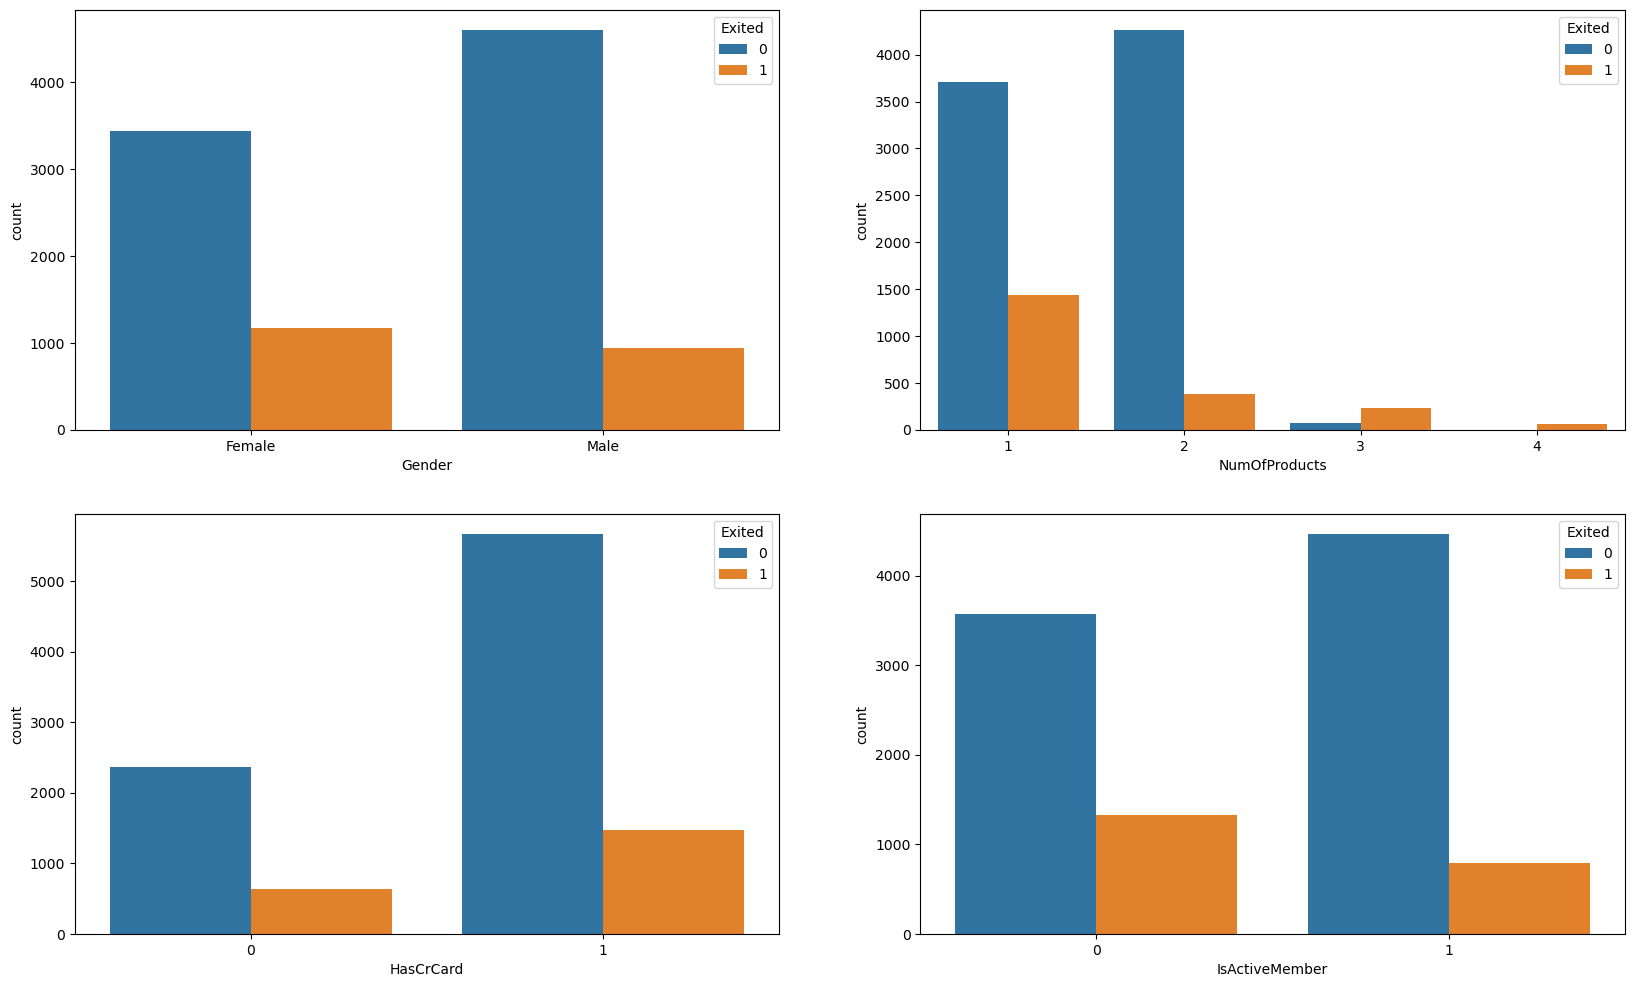

In [16]:
#checking the values with the churn customer and categorial variables

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Gender', hue = 'Exited', data = churn_data, ax=axarr[0][0])
sns.countplot(x='NumOfProducts', hue = 'Exited', data = churn_data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = churn_data, ax=axarr[1][0] )
sns.countplot(x='IsActiveMember', hue = 'Exited', data = churn_data,  ax=axarr[1][1])

In [17]:
#numeric varaibles

numeric_varaibles = [column for column in churn_data.columns if churn_data[column].dtype != "object" 
                     and churn_data[column].nunique() >11]
numeric_varaibles

# column is merice if values is not object and its value is bigger then 11

['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

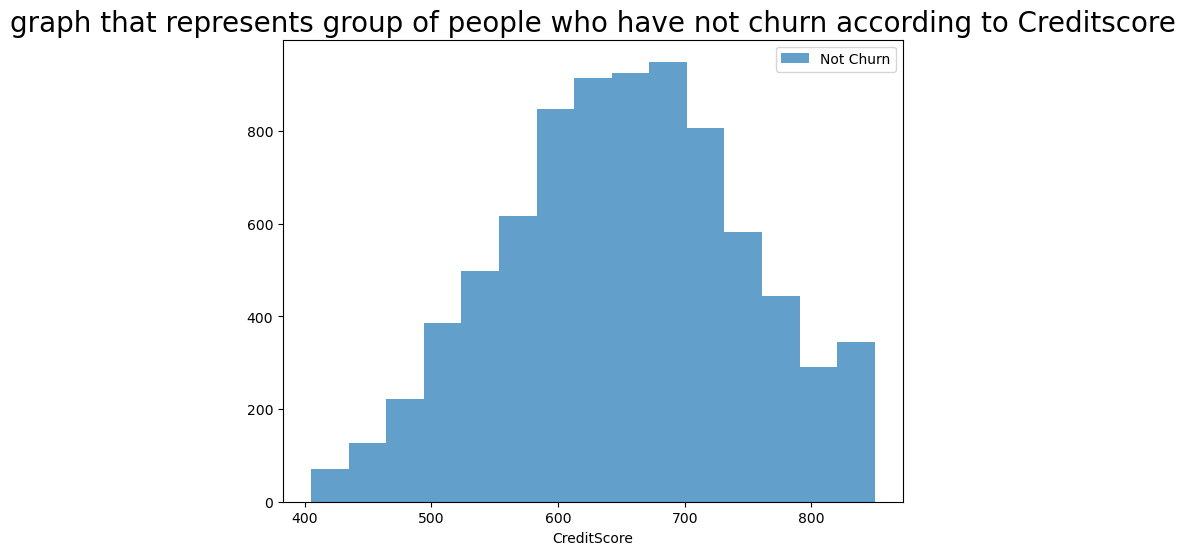

In [18]:
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')        # using histogram to see the highest not churn group according to creditscore
plt.hist(have_stayed["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')     #displaying the label
plt.title("graph that represents group of people who have not churn according to Creditscore", size = 20)
plt.show()

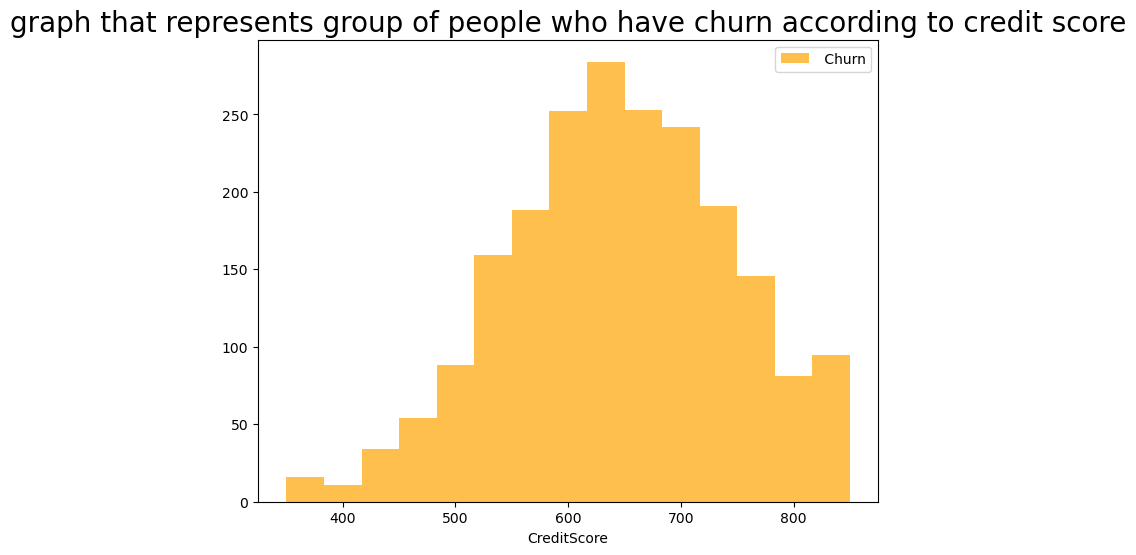

In [19]:
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')        # using histogram to see the highest churn group according to creditscore
plt.hist(have_leaved["CreditScore"],bins=15, alpha=0.7, label=' Churn', color='orange')
plt.legend(loc='upper right')     ##displaying the label
plt.title("graph that represents group of people who have churn according to credit score", size = 20)
plt.show()

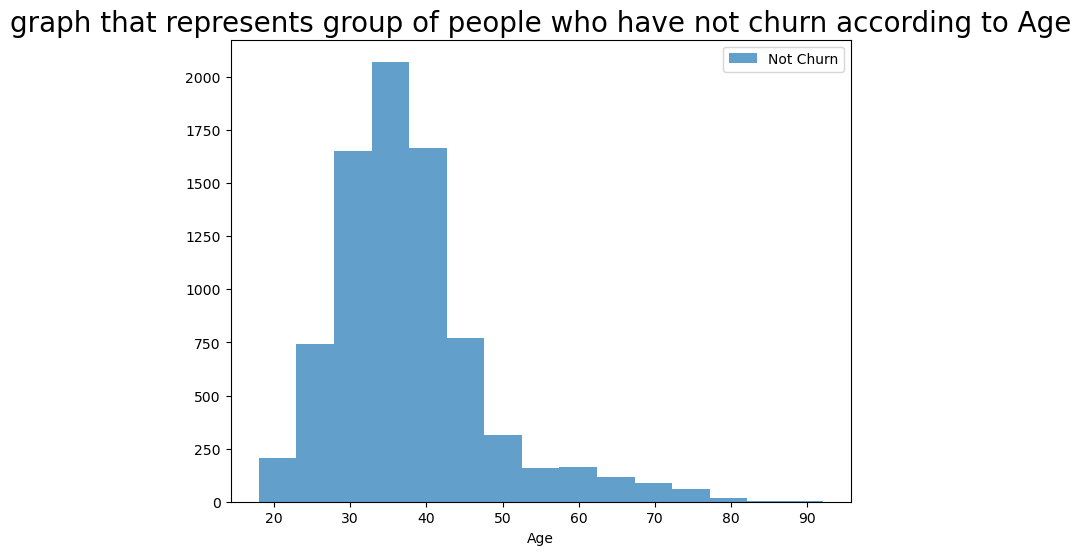

In [20]:
plt.figure(figsize=(8,6))
plt.xlabel('Age')            # using histogram to see the highest non-churn group according to age
plt.hist(have_stayed["Age"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')     ##displaying the label
plt.title("graph that represents group of people who have not churn according to Age", size = 20)
plt.show()

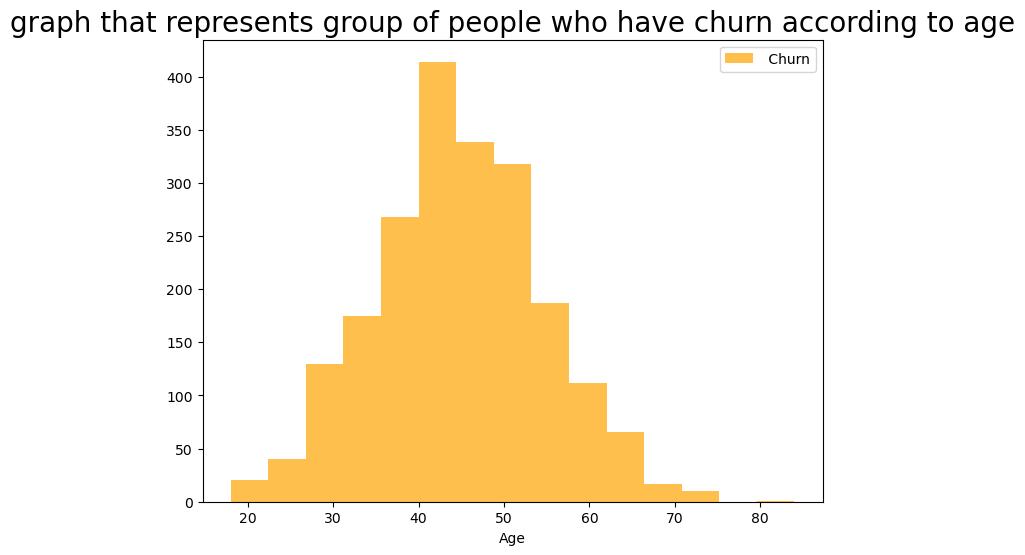

In [21]:
plt.figure(figsize=(8,6))
plt.xlabel('Age')              # using histogram to see the highest churn group according to age
plt.hist(have_leaved["Age"],bins=15, alpha=0.7, label=' Churn', color='orange')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have churn according to age", size = 20)
plt.show()

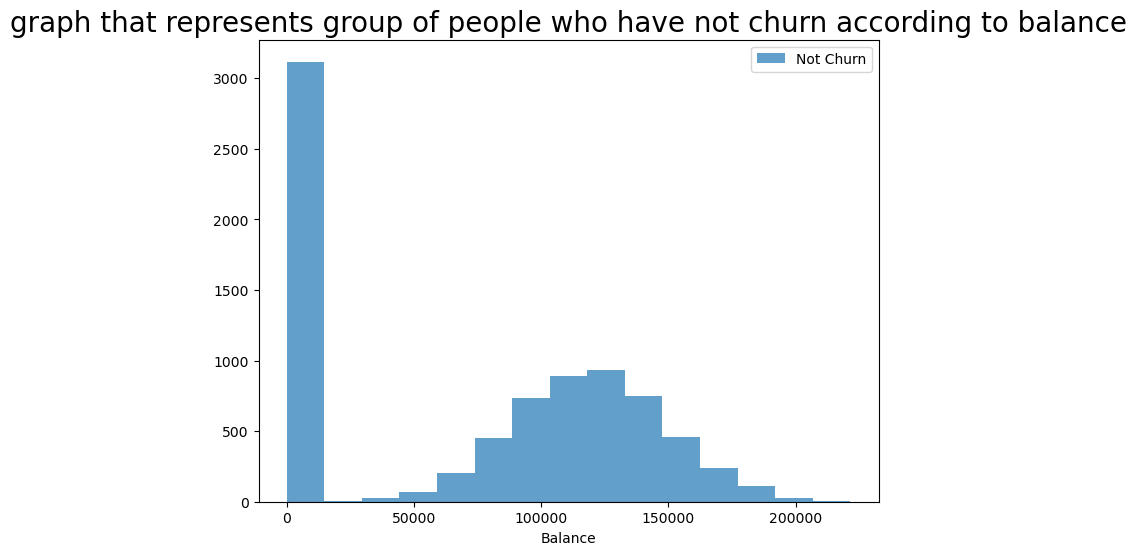

In [22]:
plt.figure(figsize=(8,6))
plt.xlabel('Balance')            # using histogram to see the highest non- churn group according to balance
plt.hist(have_stayed["Balance"],bins=15, alpha=0.7, label='Not Churn')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have not churn according to balance", size = 20)
plt.show()

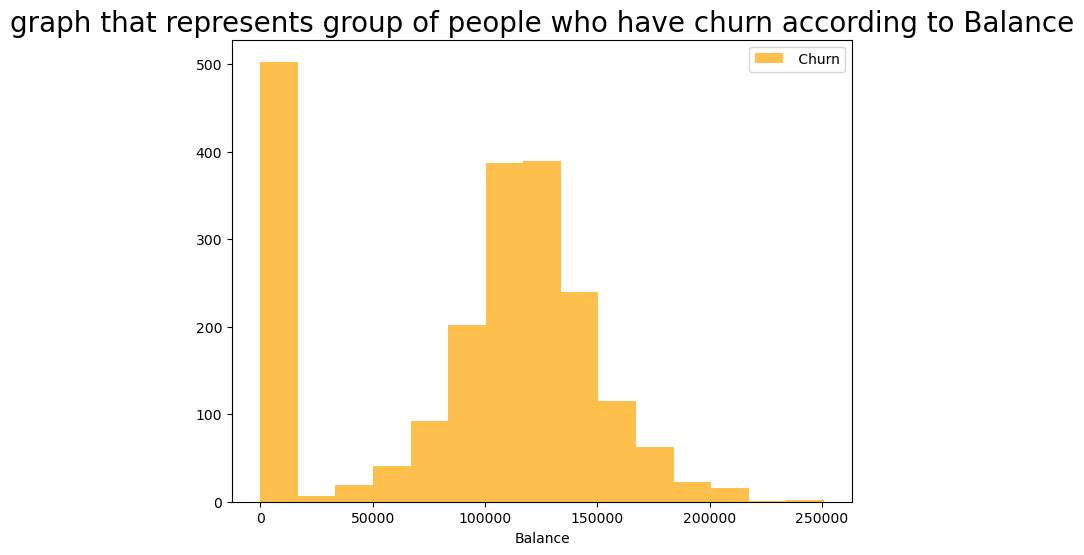

In [23]:
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
plt.hist(have_leaved["Balance"],bins=15, alpha=0.7, label=' Churn', color='orange')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have churn according to Balance", size = 20)
plt.show()

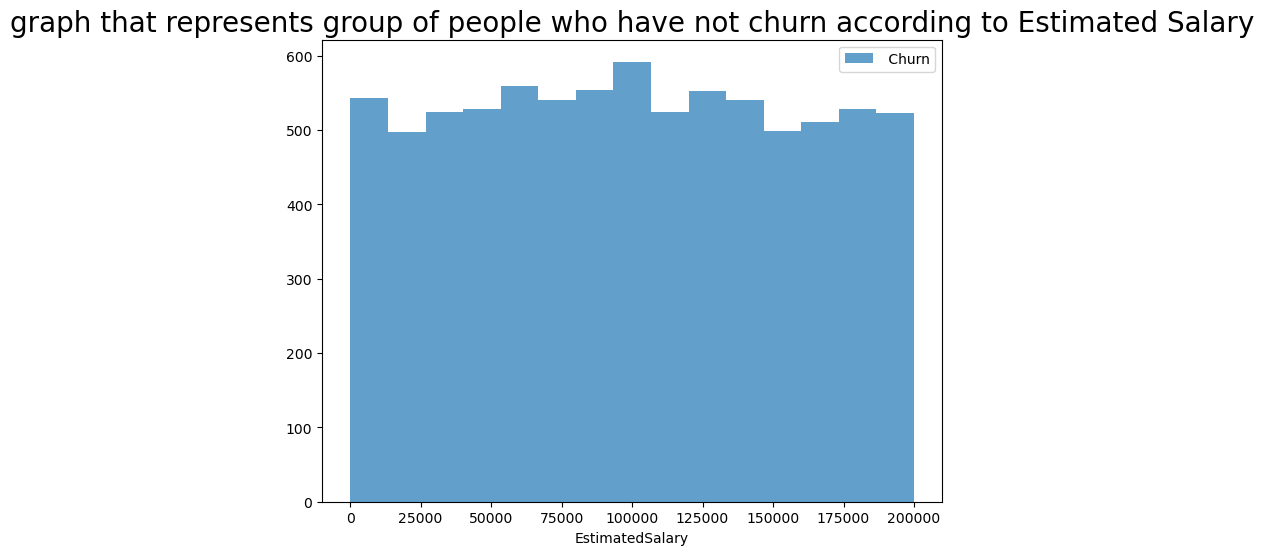

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(have_stayed["EstimatedSalary"],bins=15, alpha=0.7, label=' Churn')
plt.legend(loc='upper right')
plt.title("graph that represents group of people who have not churn according to Estimated Salary", size = 20)
plt.show()

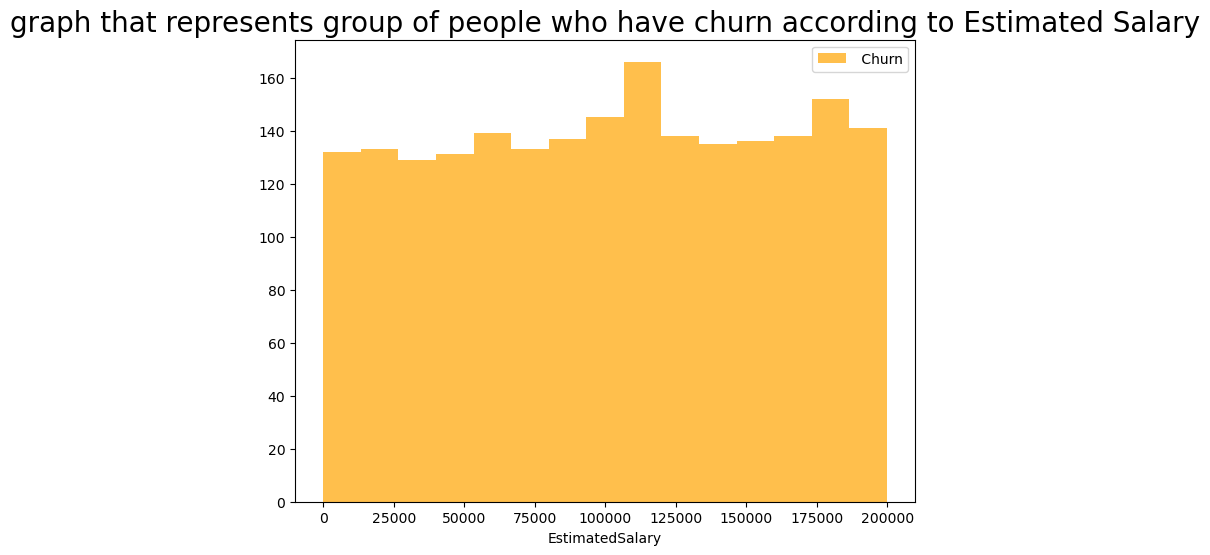

In [25]:
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(have_leaved["EstimatedSalary"],bins=15, alpha=0.7, label=' Churn', color='orange')
plt.title("graph that represents group of people who have churn according to Estimated Salary", size = 20)
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

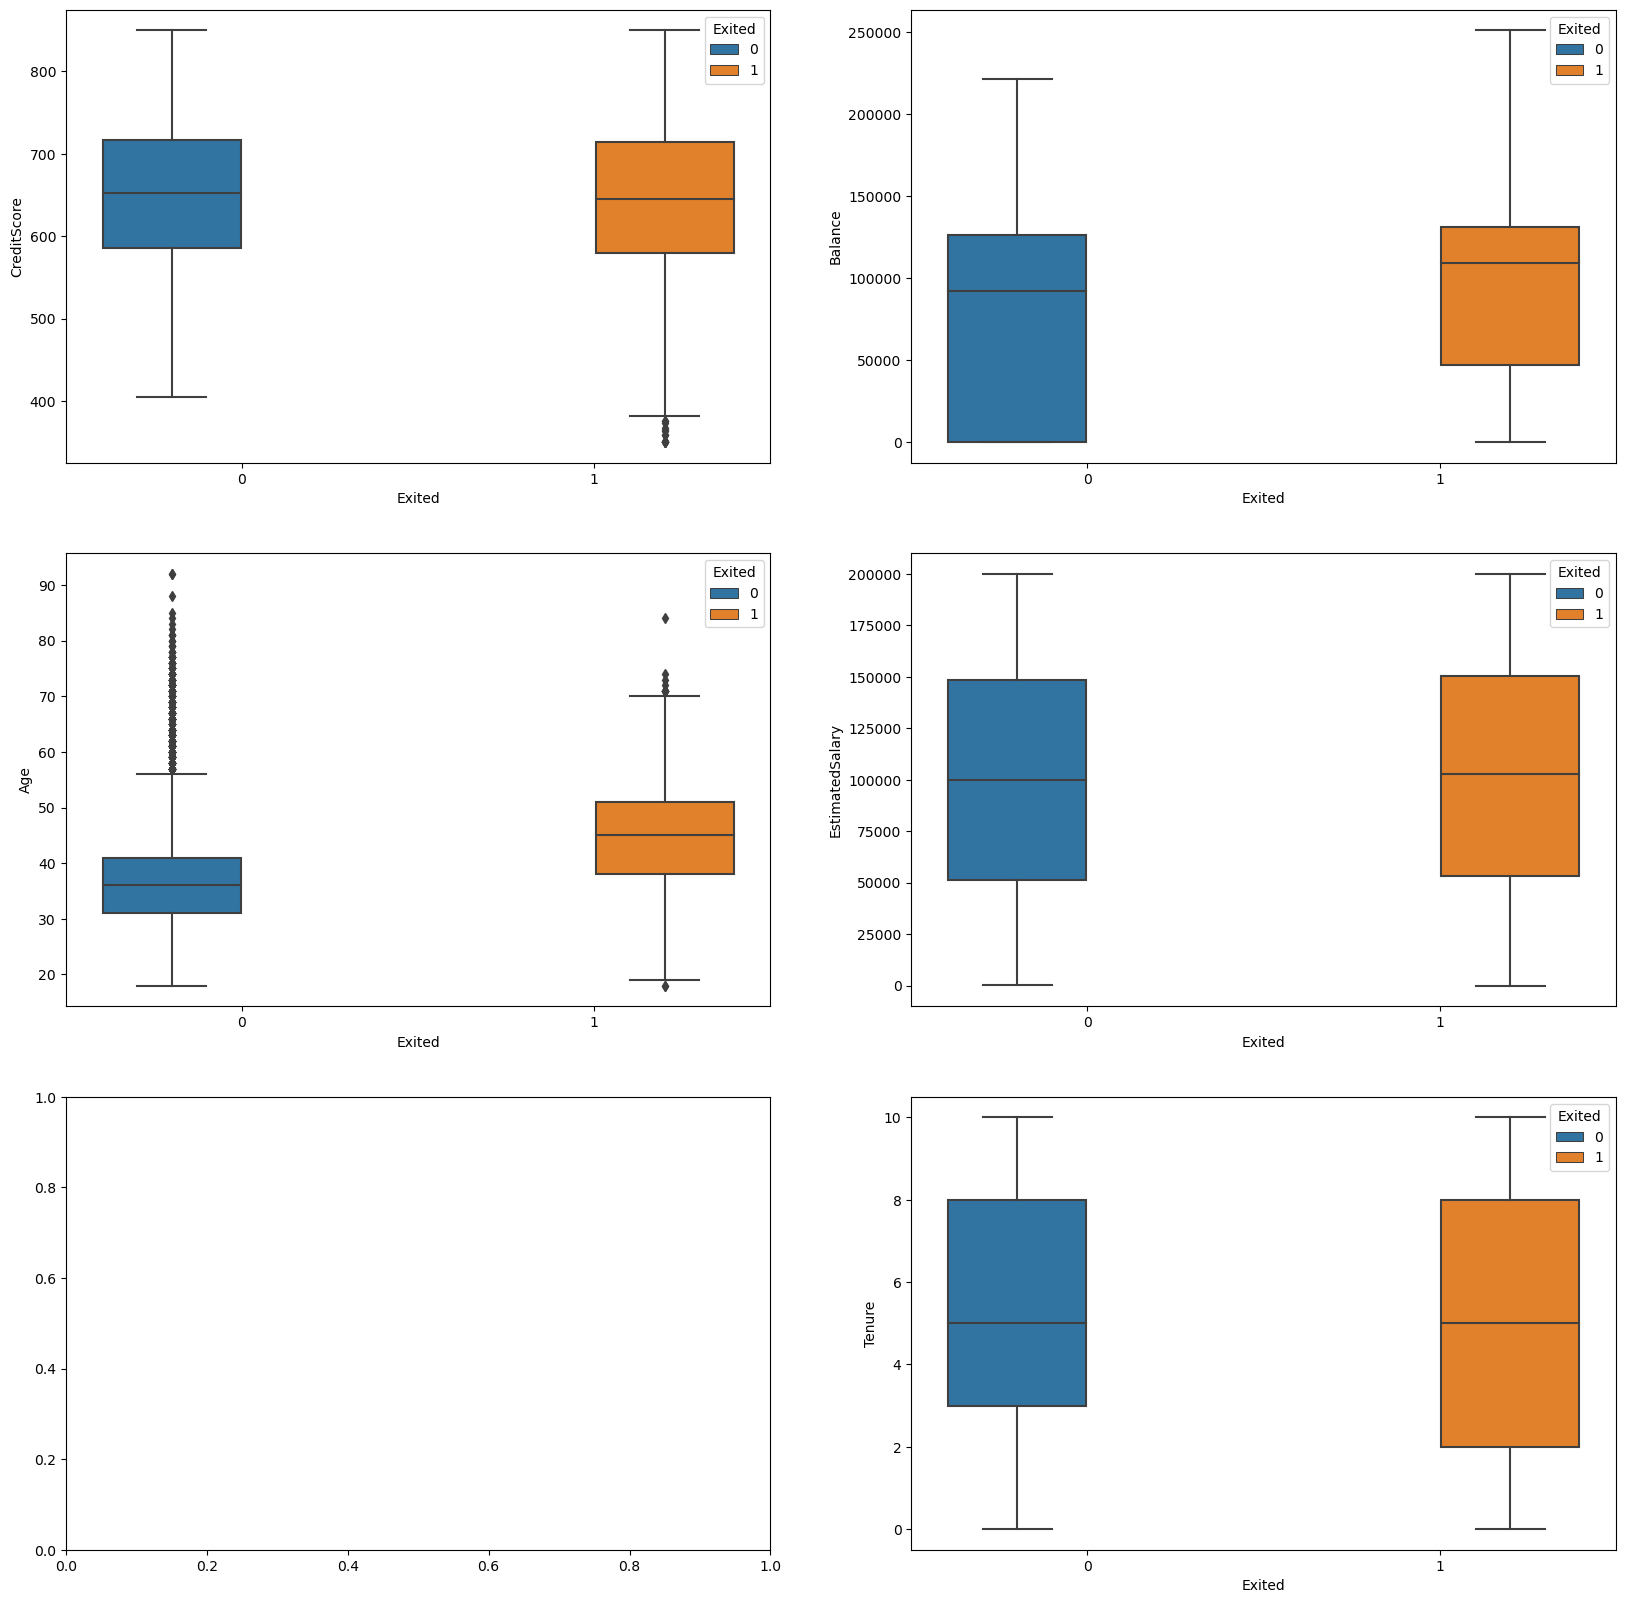

In [26]:
#churn customer ccording to age, creditscore, tenure, balance, Num of products, eztin=mated salary

fig, axarr = plt.subplots(3,2, figsize=(20,20))
sns.boxplot(y='CreditScore', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[0,0])
sns.boxplot(y='Balance', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[0,1])
sns.boxplot(y='Age', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[1,0])
sns.boxplot(y='EstimatedSalary', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[1,1])
sns.boxplot(y='Tenure', x ='Exited', hue = 'Exited', data = churn_data, ax=axarr[2,1])

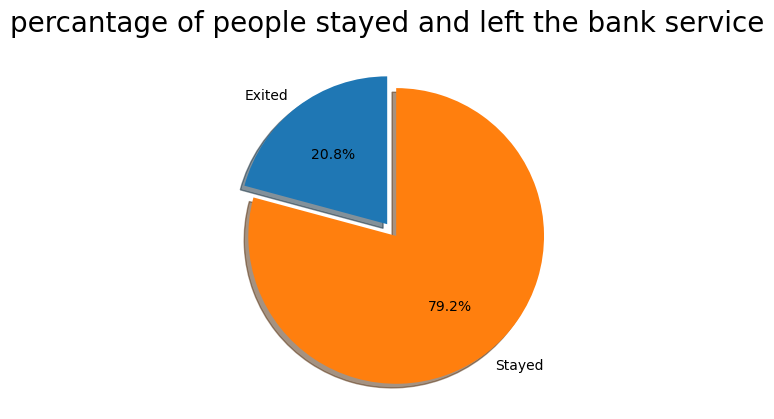

In [27]:
labels = 'Exited', 'Stayed'
sizes = [churn_data.Exited[churn_data['Exited']==1].count(), churn_data.Exited[churn_data['Exited']==0].count()]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("percantage of people stayed and left the bank service", size = 20)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    8038
1    2112
Name: Exited, dtype: int64

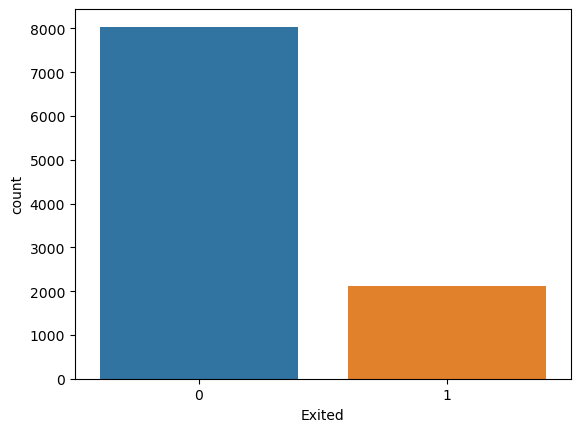

In [28]:
# handling uneven data 
sns.countplot(churn_data['Exited'])
churn_data['Exited'].value_counts()

#(churn_data.Exited ==1).sum()
#(churn_data.Exited ==0).sum()   trying

<AxesSubplot:>

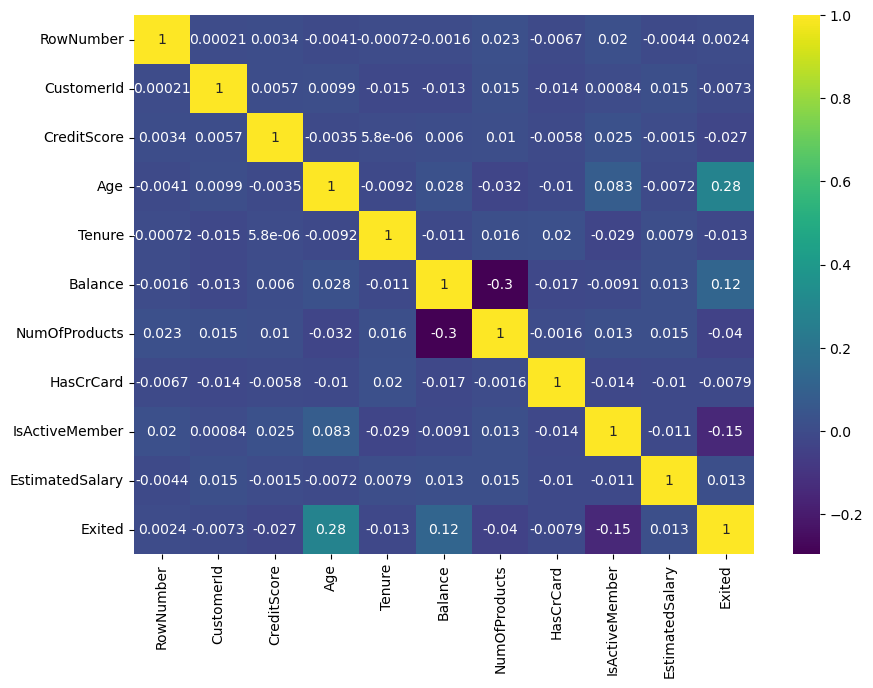

In [29]:
# Correlation Matrix
plt.figure(figsize=(10,7))
sns.heatmap(churn_data.corr(),annot=True, cmap = 'viridis')

In [30]:
#fig, ax =  plt.subplots(3, 2, figsize=(15, 12))
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", sizes = (10, 200), data = churn_data, ax=ax[0,0])
#sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = churn_data, ax=ax[0,1])
#sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = churn_data, ax=ax[0,1]

In [31]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


<h1>Data Preparation</h1>

In [32]:
#Data preparation

In [33]:
churn_data.isnull().sum()   # the 

RowNumber           0
CustomerId          0
Surname             0
CreditScore        32
Geography           0
Gender              0
Age                25
Tenure              0
Balance            33
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    48
Exited              0
dtype: int64

In [34]:
#the null values from the row droped 

churn_data.dropna(subset=['CreditScore', 'Age', 'EstimatedSalary', 'Balance'], inplace=True)

In [35]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
#Calculate the number of duplicated rows in the DataFrame
duplicates=churn_data.duplicated().sum()

#printitng the value for demonstration
print("the duplicated data are: ",duplicates)

the duplicated data are:  0


In [37]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10149
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10019 non-null  int64  
 1   CustomerId       10019 non-null  int64  
 2   Surname          10019 non-null  object 
 3   CreditScore      10019 non-null  float64
 4   Geography        10019 non-null  object 
 5   Gender           10019 non-null  object 
 6   Age              10019 non-null  float64
 7   Tenure           10019 non-null  int64  
 8   Balance          10019 non-null  float64
 9   NumOfProducts    10019 non-null  int64  
 10  HasCrCard        10019 non-null  int64  
 11  IsActiveMember   10019 non-null  int64  
 12  EstimatedSalary  10019 non-null  float64
 13  Exited           10019 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [38]:
#handling unmanaged or outliers data 
#defining the the columns
containing_outliers = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
#using loop to iterate for all the column in i variable 
for i in containing_outliers :
    #calculate the mean and std of the columns data
    mean_value = churn_data[i].mean()
    std_value = churn_data[i].std()
    #range provide and out of range removed
    churn_data = churn_data[(churn_data[i] >= mean_value - 3 * std_value) & (churn_data[i] <=mean_value + 3 * std_value)] 

In [39]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9818 entries, 0 to 10149
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9818 non-null   int64  
 1   CustomerId       9818 non-null   int64  
 2   Surname          9818 non-null   object 
 3   CreditScore      9818 non-null   float64
 4   Geography        9818 non-null   object 
 5   Gender           9818 non-null   object 
 6   Age              9818 non-null   float64
 7   Tenure           9818 non-null   int64  
 8   Balance          9818 non-null   float64
 9   NumOfProducts    9818 non-null   int64  
 10  HasCrCard        9818 non-null   int64  
 11  IsActiveMember   9818 non-null   int64  
 12  EstimatedSalary  9818 non-null   float64
 13  Exited           9818 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [40]:
#converting any str object to int 

#using pandas library to convert the string to the muneric values
churn_data['Balance'] = pd.to_numeric(churn_data['Balance'], errors='coerce')
#coerce is used to convert the non convertable value to the null values
churn_data['CreditScore'] = pd.to_numeric(churn_data['CreditScore'], errors='coerce')
#using pandas library to convert the string to the muneric values
churn_data['Age'] = pd.to_numeric(churn_data['Age'], errors='coerce')
#coerce is used to convert the non convertable value to the null values
churn_data['Tenure'] = pd.to_numeric(churn_data['Tenure'], errors='coerce')
#using pandas library to convert the string to the muneric values
churn_data['NumOfProducts'] = pd.to_numeric(churn_data['NumOfProducts'], errors='coerce')
#coerce is used to convert the non convertable value to the null values
churn_data['EstimatedSalary'] = pd.to_numeric(churn_data['EstimatedSalary'], errors='coerce')
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9818 entries, 0 to 10149
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9818 non-null   int64  
 1   CustomerId       9818 non-null   int64  
 2   Surname          9818 non-null   object 
 3   CreditScore      9818 non-null   float64
 4   Geography        9818 non-null   object 
 5   Gender           9818 non-null   object 
 6   Age              9818 non-null   float64
 7   Tenure           9818 non-null   int64  
 8   Balance          9818 non-null   float64
 9   NumOfProducts    9818 non-null   int64  
 10  HasCrCard        9818 non-null   int64  
 11  IsActiveMember   9818 non-null   int64  
 12  EstimatedSalary  9818 non-null   float64
 13  Exited           9818 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [41]:
#column which does not affect the value of the churn are droped
churn_data=churn_data.drop(['RowNumber','CustomerId', 'Surname', 'Geography', ], axis =1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [42]:
#one hot encoding
# converting str column into int or binary vector
#using get dummies method(create dummy variabe trap= where the datas are higly corelated)

churn_data = pd.get_dummies(churn_data,drop_first=True)
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619.0,42.0,2,0.00,1,1,1,101348.88,1,0
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,1,0
3,699.0,39.0,1,0.00,2,0,0,93826.63,0,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0,0


In [43]:
# the dataset is imbalanced till now 
# from here oversampling is done to match the number
corr_data = churn_data.drop('Exited', axis=1)
corr_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male
0,619.0,42.0,2,0.00,1,1,1,101348.88,0
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,0
3,699.0,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0


In [44]:
corr_data2=churn_data['Exited']  #a dataset is created where only exited colimn is only presented
corr_data2.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [45]:
#Oversmapling
#smote

# here two new variable is created where new datas are passed.
new_corr_data, new_corr_data2 = SMOTE().fit_resample(corr_data, corr_data2)  
new_corr_data2.value_counts()

1    7855
0    7855
Name: Exited, dtype: int64

<h2> Training, splitting and test</h2>

In [46]:
#splitting the dataset into the training  set and test set
X_train,X_test,Y_train,Y_test = train_test_split(new_corr_data,new_corr_data2,test_size=0.20, random_state = 42 )

In [47]:

# Sc variable created for StandardScaler
sc= StandardScaler()    
# scaling the feature of the training set  and transformation applied to both X_train and X_test
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
X_train

array([[ 1.36885602, -0.6259687 ,  0.07329099, ..., -0.75967842,
        -1.43655122, -0.83706427],
       [ 2.20615818,  0.0297861 ,  0.43997938, ...,  1.31634646,
         1.18445126, -0.83706427],
       [-0.49127956,  1.07848967,  0.07329099, ..., -0.75967842,
        -0.22367976, -0.83706427],
       ...,
       [-0.37537247, -0.07540737, -0.66008577, ...,  1.31634646,
        -0.40359229, -0.83706427],
       [-1.24320618, -0.07540737,  1.17335614, ...,  1.31634646,
        -1.27391127, -0.83706427],
       [-0.71591481, -0.49618125,  1.17335614, ...,  1.31634646,
        -1.65814608,  1.1946514 ]])

In [49]:
#Model Training 

In [50]:
#logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression #import the logisticregression
log = LogisticRegression()   # variables created
log.fit(X_train,Y_train) # trainging the model wtith the train set
y_predict_from_log=log.predict(X_test)  # analyze the prediction of the model

In [52]:
accuracy_score(Y_test,y_predict_from_log)

0.7858052196053469

In [53]:
precision_score(Y_test, y_predict_from_log)

0.7722772277227723

In [54]:
recall_score(Y_test, y_predict_from_log)

0.8036059240180297

In [55]:
f1_score(Y_test, y_predict_from_log)

0.7876301672451879

In [56]:
#pc = true positive / {false Positive + true Positive}

#Rc = true positive / {false Negative + true Positive}

#F1 = true positive / {false Positive + true Positive}

In [57]:
        joblib.dump(log,'churn_predict_model')
        LRmodel = joblib.load('churn_predict_model')


In [58]:
churn_data.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
10139,631.0,41.0,7,87654.32,2,1,1,96432.78,1,1
10142,595.0,35.0,10,87654.32,2,0,1,98076.54,0,0
10144,605.0,33.0,6,109876.54,1,0,0,98765.43,0,0
10146,615.0,36.0,9,93456.67,3,0,1,105432.09,0,1
10149,672.0,43.0,5,93456.67,2,1,1,98765.43,1,1


In [59]:
LRmodel.predict([[631, 41, 7, 87654, 2,1,1,96432,1]])

array([1], dtype=int64)

Confusion matrix
[[1221  368]
 [ 305 1248]]


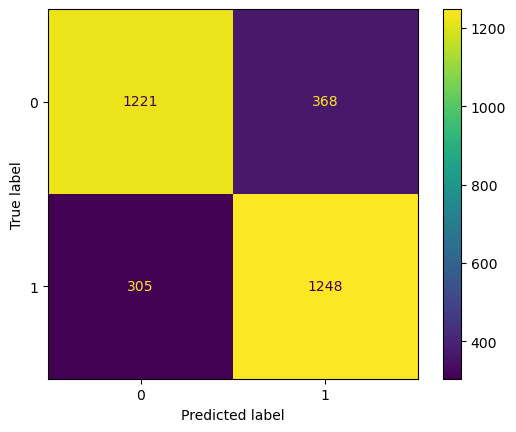

In [60]:


conf_matrix = confusion_matrix(Y_test, y_predict_from_log)
print('Confusion matrix')
print(conf_matrix)

disp = ConfusionMatrixDisplay(conf_matrix)

disp.plot()
plt.show()

In [61]:
# random forest Classifier

In [62]:
  # import RandomForestClassifier

In [63]:
rf = RandomForestClassifier()   #create a variable named rf
rf.fit(X_train, Y_train)        #training the data given to train the model
y_predict_from_rf = rf.predict(X_test)    # predict correct decision using the test data

In [64]:
accuracy_score(Y_test, y_predict_from_rf)

0.8593252705283259

In [65]:
precision_score(Y_test, y_predict_from_rf)

0.8618892508143322

In [66]:
recall_score(Y_test, y_predict_from_rf)

0.8518995492594977

In [67]:
f1_score(Y_test, y_predict_from_rf)

0.8568652849740932

In [68]:
joblib.dump(rf,'churn_predict_model')
rfmodel = joblib.load('churn_predict_model')


In [69]:
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619.0,42.0,2,0.00,1,1,1,101348.88,1,0
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,1,0
3,699.0,39.0,1,0.00,2,0,0,93826.63,0,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0,0


In [70]:
rfmodel.predict([[619, 42, 2, 0, 1,1,1,101348,0]])

array([0], dtype=int64)

Confusion matrix
[[1377  212]
 [ 230 1323]]


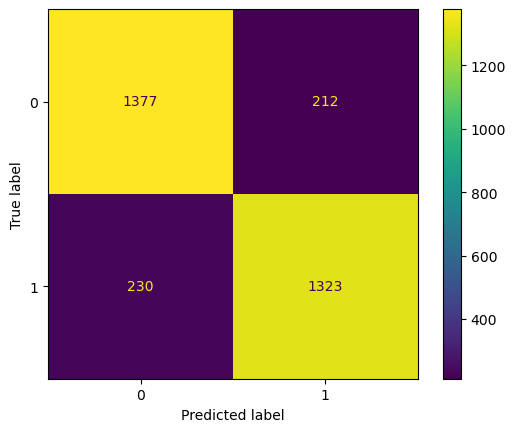

In [71]:


conf_matrix = confusion_matrix(Y_test, y_predict_from_rf)
print('Confusion matrix')
print(conf_matrix)

disp = ConfusionMatrixDisplay(conf_matrix)

disp.plot()
plt.show()

In [72]:
# test the model using value
new_corr_data = sc.fit_transform(new_corr_data)
rf.fit(new_corr_data,new_corr_data2)

RandomForestClassifier()

In [73]:

NBmodel = GaussianNB()
NBmodel.fit(X_train, Y_train)
y_predict_from_NB = NBmodel.predict(X_test)

In [74]:
accuracy_score(Y_test, y_predict_from_NB)

0.7899427116486314

In [75]:
precision_score(Y_test, y_predict_from_NB)

0.7809943360604154

In [76]:
recall_score(Y_test, y_predict_from_NB)

0.7990985189954926

In [77]:
f1_score(Y_test, y_predict_from_NB)

0.7899427116486314

In [78]:
joblib.dump(NBmodel,'churn_predict_model')
nbmodel = joblib.load('churn_predict_model')

In [79]:
churn_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619.0,42.0,2,0.00,1,1,1,101348.88,1,0
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,1,0
3,699.0,39.0,1,0.00,2,0,0,93826.63,0,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0,0


In [80]:
nbmodel.predict([[608, 41, 1, 83807, 1,0,1,112542,0]])

array([0], dtype=int64)

Confusion matrix
[[1241  348]
 [ 312 1241]]


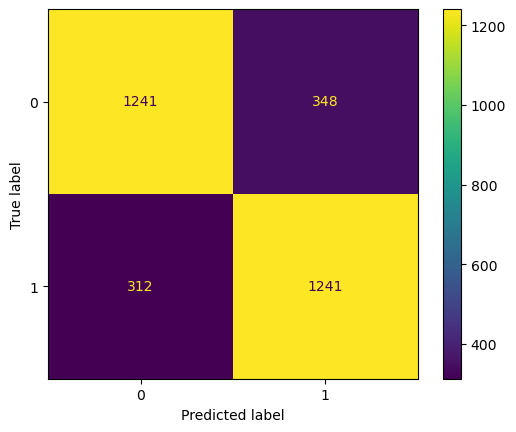

In [81]:


conf_matrix = confusion_matrix(Y_test, y_predict_from_NB)
print('Confusion matrix')
print(conf_matrix)

disp = ConfusionMatrixDisplay(conf_matrix)

disp.plot()
plt.show()

In [82]:
final_data = pd.DataFrame({'Models':['LR','RF','NB'],
                          'ACC':[accuracy_score(Y_test,y_predict_from_log),
                                accuracy_score(Y_test,y_predict_from_rf),
                                accuracy_score(Y_test,y_predict_from_NB)]})

In [83]:
final_data

,Models,ACC
0,LR,0.785805
1,RF,0.859325
2,NB,0.789943


In [84]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators' : [50,100], 'min_samples_split': [3, 5, 6, 7]}
# randFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, refit = True, verbose = 0)
# randFor_grid.fit(X_train,Y_train)
# best_model(randFor_grid)

In [85]:
train1 = RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_leaf=2)
train1.fit(X_train, Y_train)
y_predict_from_rf = rf.predict(X_test)

predictions = train1.predict(X_test)

precision = precision_score(predictions, Y_test)
recall = recall_score(predictions, Y_test)
accuracy = accuracy_score(predictions, Y_test)
f1 = f1_score(predictions, Y_test)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8152
Recall: 0.8126
F1-Score: 0.8139
Accuracy: 0.8157
Error Rate: 0.1843


In [86]:
train1 = RandomForestClassifier(n_estimators=200, max_depth=4,min_samples_leaf=5)
train1.fit(X_train, Y_train)
y_predict_from_rf = rf.predict(X_test)

predictions = train1.predict(X_test)

precision = precision_score(predictions, Y_test)
recall = recall_score(predictions, Y_test)
accuracy = accuracy_score(predictions, Y_test)
f1 = f1_score(predictions, Y_test)
error_rate = 1 - accuracy

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')

Precision: 0.8068
Recall: 0.8211
F1-Score: 0.8139
Accuracy: 0.8176
Error Rate: 0.1824
